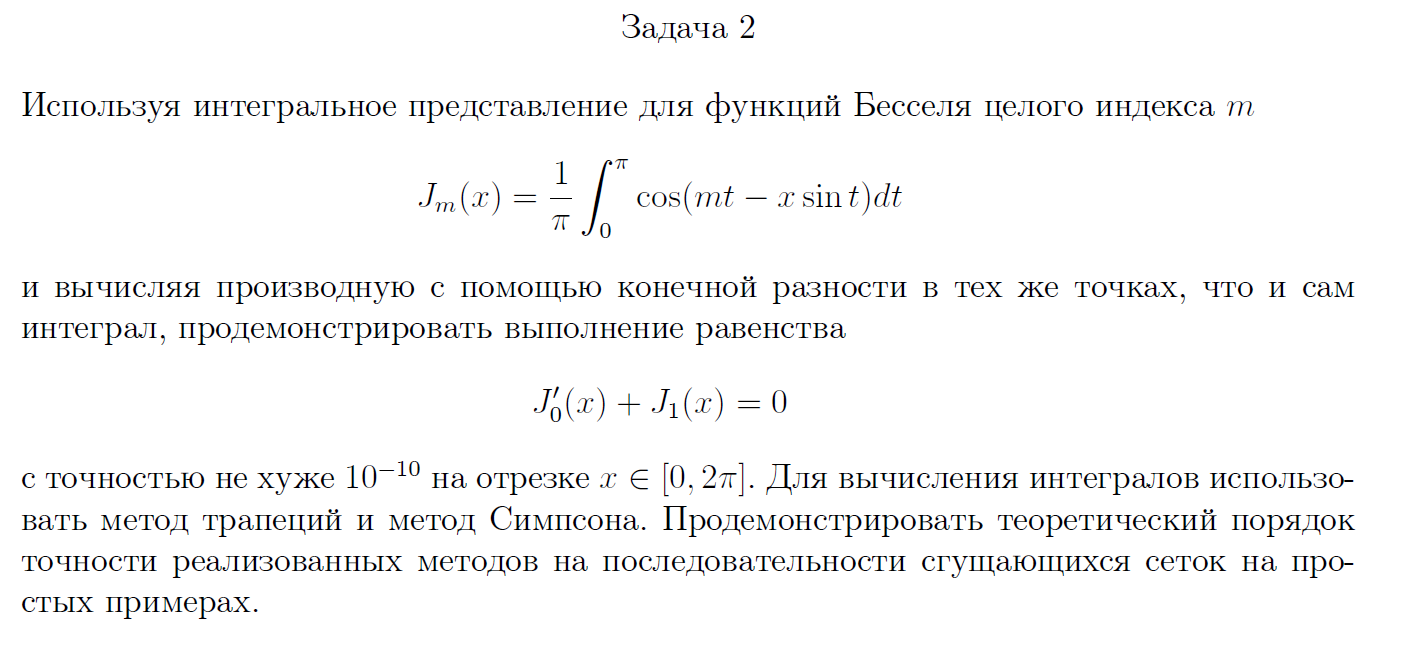

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x, t, m):
    return np.cos(m*t - x*np.sin(t))

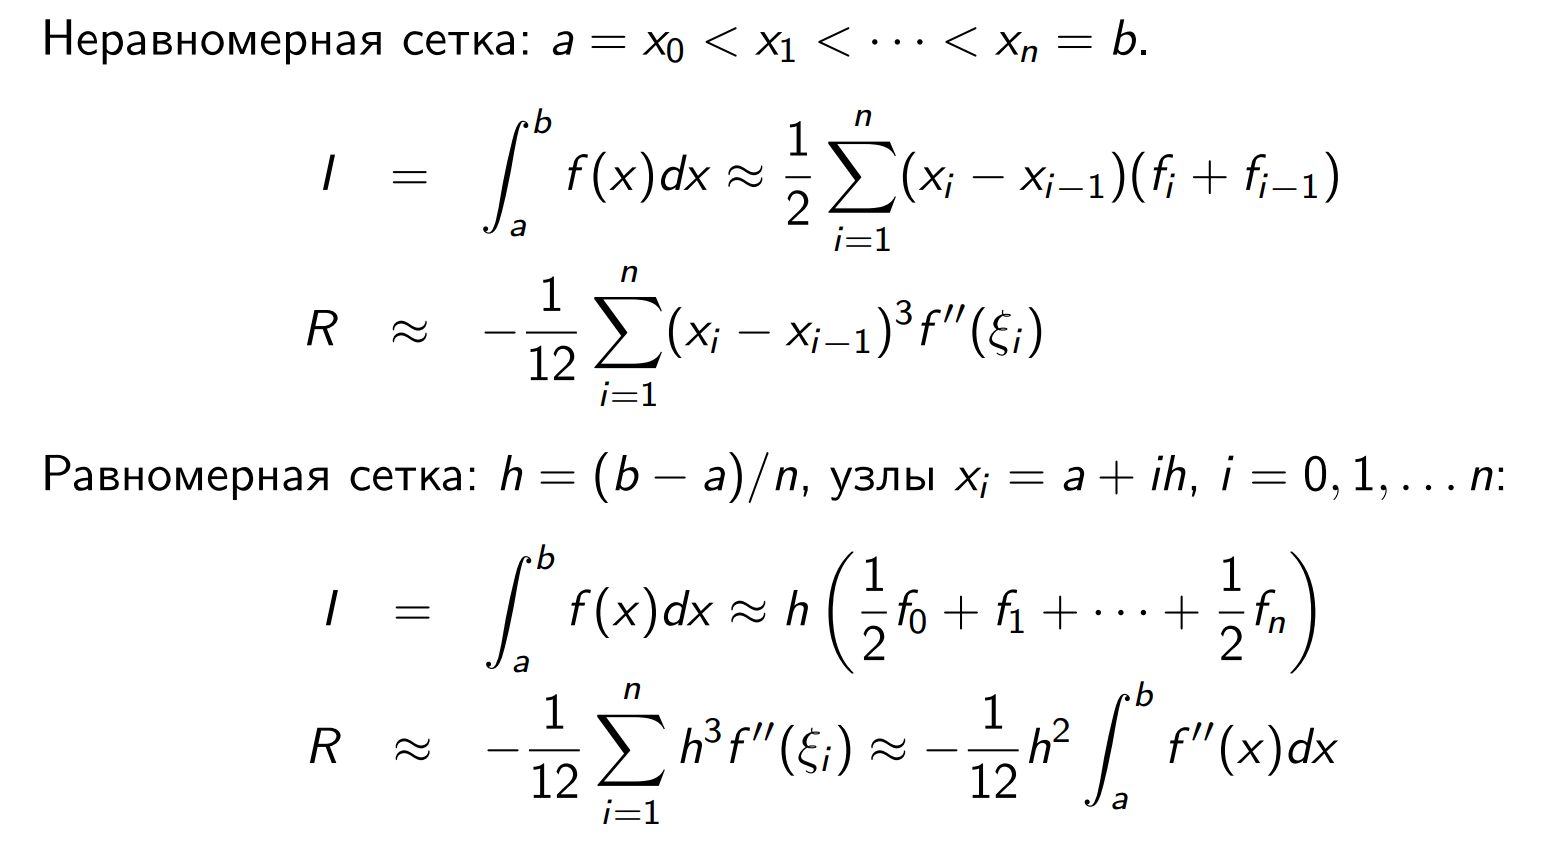

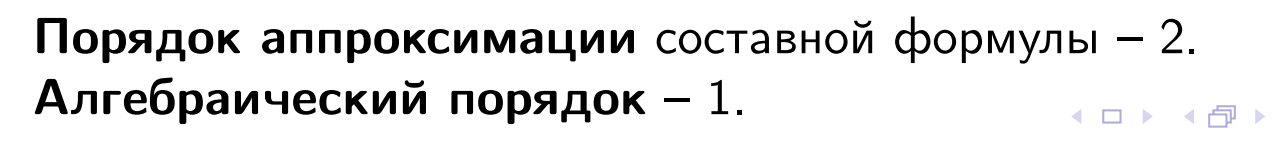

In [3]:
def integral_trapezoid(a, b, n, func): #Для равномерной сетки
    h = (b - a)/n
    x = np.linspace(a, b, n+1)
    f = np.vectorize(func)(x)
    return (np.sum(f[1:-1]) + (f[0] + f[-1])/2)*h

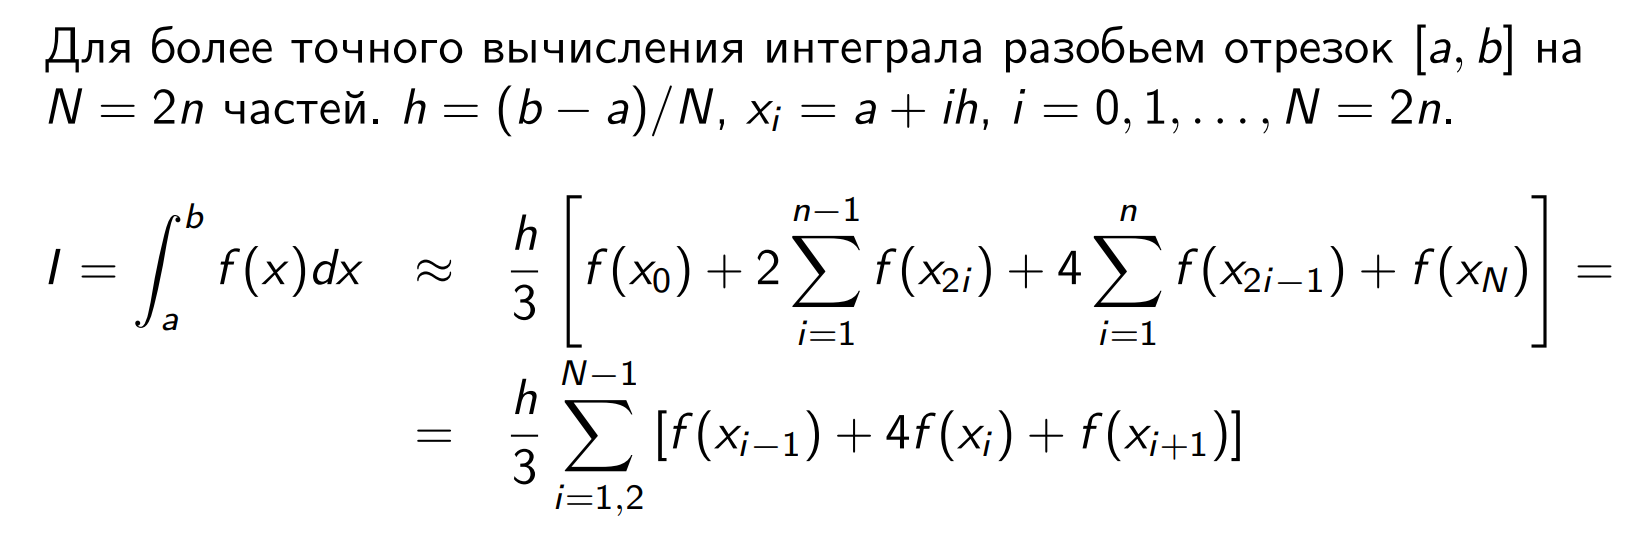

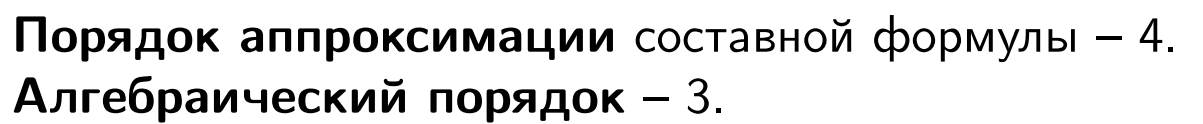

In [4]:
def integral_simpson(a, b, n, func):
    num = int(np.floor(n/2)*2)
    h = (b - a)/num
    x = np.linspace(a, b, num+1)
    f = np.vectorize(func)(x)
    return np.sum(f[0: -2: 2] + 4*f[1: -1: 2] + f[2: : 2])*h/3

In [5]:
def func_prime(x, h, func):
    return (func(x + h) - func(x))/h

## Методом Симпсона ##

In [6]:
def J_sim(x, m, n):
    f_tmp = lambda t: func(x, t, m)
    return integral_simpson(0, np.pi, n, f_tmp)/np.pi

In [7]:
def J_sim_prime(x, m, n, h):
    J_tmp = lambda l: J_sim(l, m, n)
    return func_prime(x, h, J_tmp)

## Методом Трапеций ##

In [8]:
def J_trap(x, m, n):
    f_tmp = lambda t: func(x, t, m)
    return integral_trapezoid(0, np.pi, n, f_tmp)/np.pi

In [9]:
def J_trap_prime(x, m, n, h):
    J_tmp = lambda l: J_trap(l, m, n)
    return func_prime(x, h, J_tmp)

## Графики ##

## Равенство методом Симпсона ##

In [22]:
x_plot = []
y1_plot = []
for i in range(0, 10):
    x = np.linspace(0, 2*np.pi, 10)
    x_plot.append(i)
    
    tmp1 = np.vectorize(J_sim_prime)(x, 0, 128, np.pi/(10**i))
    tmp2 = np.vectorize(J_sim)(x, 1, 128)
    y1_plot.append(np.max(tmp1+tmp2))

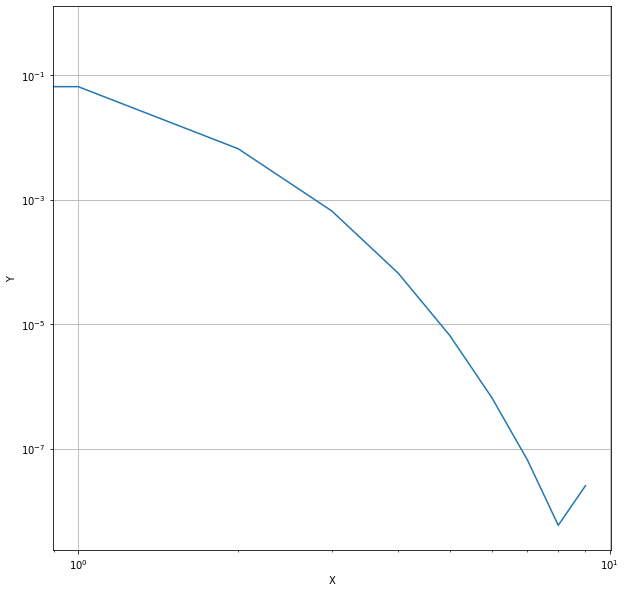

In [23]:
plt.figure(figsize=(10, 10))
plt.xlabel('X')
plt.ylabel('Y')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.plot(x_plot, y1_plot)
plt.show()

## Равенство методом трапеций ##

In [27]:
x_plot = []
y2_plot = []
for i in range(0, 10):
    x = np.linspace(0, 2*np.pi, 10)
    x_plot.append(i)
    tmp1 = np.vectorize(J_trap_prime)(x, 0, 128, np.pi/(10**i))
    tmp2 = np.vectorize(J_trap)(x, 1, 128)
    y2_plot.append(np.max(tmp1+tmp2))

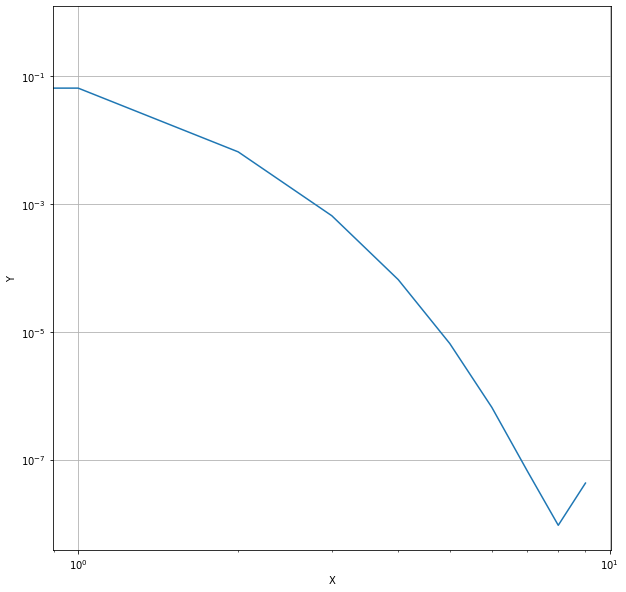

In [28]:
plt.figure(figsize=(10, 10))
plt.xlabel('X')
plt.ylabel('Y')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.plot(x_plot, y2_plot)
plt.show()

In [29]:
def func1(x):
    return np.cos(x)

In [30]:
abs_sim = np.zeros(5)
abs_trap = np.zeros(5)
for i in range(1, 6):
    abs_sim[i-1] = integral_simpson(0, np.pi/2, 10**i, func1)-1
    abs_trap[i-1] = integral_trapezoid(0, np.pi/2, 10**i, func1)-1

## Тут показываем, как с увеличением n сходится решение ##

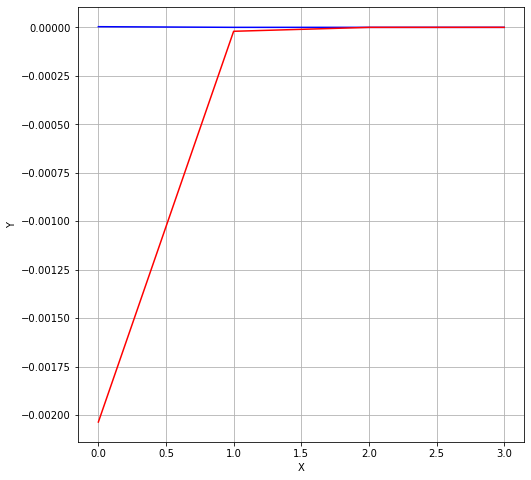

In [31]:
plt.figure(figsize=(8, 8))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.plot(abs_sim[:-1]-abs_sim[1:], 'b')
plt.plot(abs_trap[:-1]-abs_trap[1:], 'r')
plt.show()

## Порядок аппроксимации ##

C:\Users\5B34~1\AppData\Local\Temp/ipykernel_73444/1433454752.py:1: RuntimeWarning: divide by zero encountered in true_divide
  conv_acc_sim = np.log10(abs_sim[:-1]/abs_sim[1:])
C:\Users\5B34~1\AppData\Local\Temp/ipykernel_73444/1433454752.py:1: RuntimeWarning: divide by zero encountered in log10
  conv_acc_sim = np.log10(abs_sim[:-1]/abs_sim[1:])


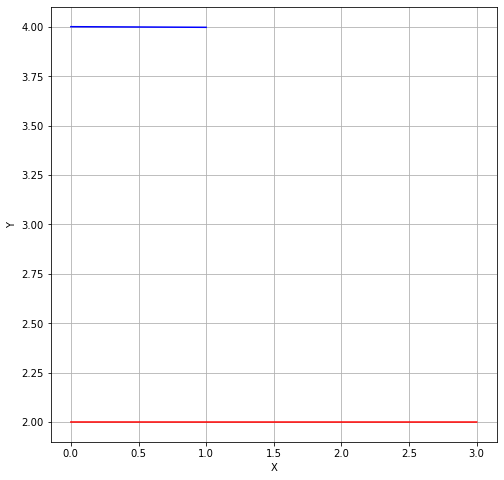

In [32]:
conv_acc_sim = np.log10(abs_sim[:-1]/abs_sim[1:])
conv_acc_trap = np.log10(abs_trap[:-1]/abs_trap[1:])

plt.figure(figsize=(8, 8))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.plot(conv_acc_sim, 'b') #Симпсон
plt.plot(conv_acc_trap, 'r') #Трапеции
plt.show()